In [6]:
import creds
import riotwatcher as rtw
import pandas as pd
import numpy as np
import mylibraries as my
import matplotlib.pyplot as plt

Make connection to API

In [2]:
connection = rtw.LolWatcher(creds.riot_API_Key)


Obtener jugador

In [3]:
Nombre_jugador = input("Ingresa tu nombre de usuario: ")
print("Elige tu region")
regiones = {1:"BR1",2:"EUNE1",3:"EUW1",4:"JP1",5:"KR",6:"LA1",7:"LA2",8:"NA1",9:"OC1",10:"TR1",11:"RU",12:"PH2",13:"SG2",14:"TH2",15:"TW2",16:"VN2"}

for region in regiones:
    print(region," ",regiones[region])

while(True):
    region = int(input())
    if region < 1 or region > 16:
        print("Region no reconocida, intenta de nuevo")
    else:
        break

region = regiones[region]
try:
    jugador = connection.summoner.by_name(region = region, summoner_name=Nombre_jugador)
    print("Jugador encontrado!")
except:
    print("Jugador no encontrado")

Elige tu region
1   BR1
2   EUNE1
3   EUW1
4   JP1
5   KR
6   LA1
7   LA2
8   NA1
9   OC1
10   TR1
11   RU
12   PH2
13   SG2
14   TH2
15   TW2
16   VN2
Jugador encontrado!


# Mejores campeones

In [5]:
Maestrias = connection.champion_mastery.by_summoner(region=region,encrypted_summoner_id=jugador["id"])
campeones = my.GetChampsNamesAndMasteries(Maestrias)

Maestria = pd.DataFrame(campeones, columns=["Campeon","Puntos de maestria"])
Maestria


,Campeon,Puntos de maestria
0,MonkeyKing,45657
1,JarvanIV,41075
2,Poppy,34325
3,Sejuani,30602
4,Vi,27485
...,...,...
67,Ezreal,159
68,MissFortune,143
69,Tryndamere,135
70,Sona,133


#### Grafica de maestrias

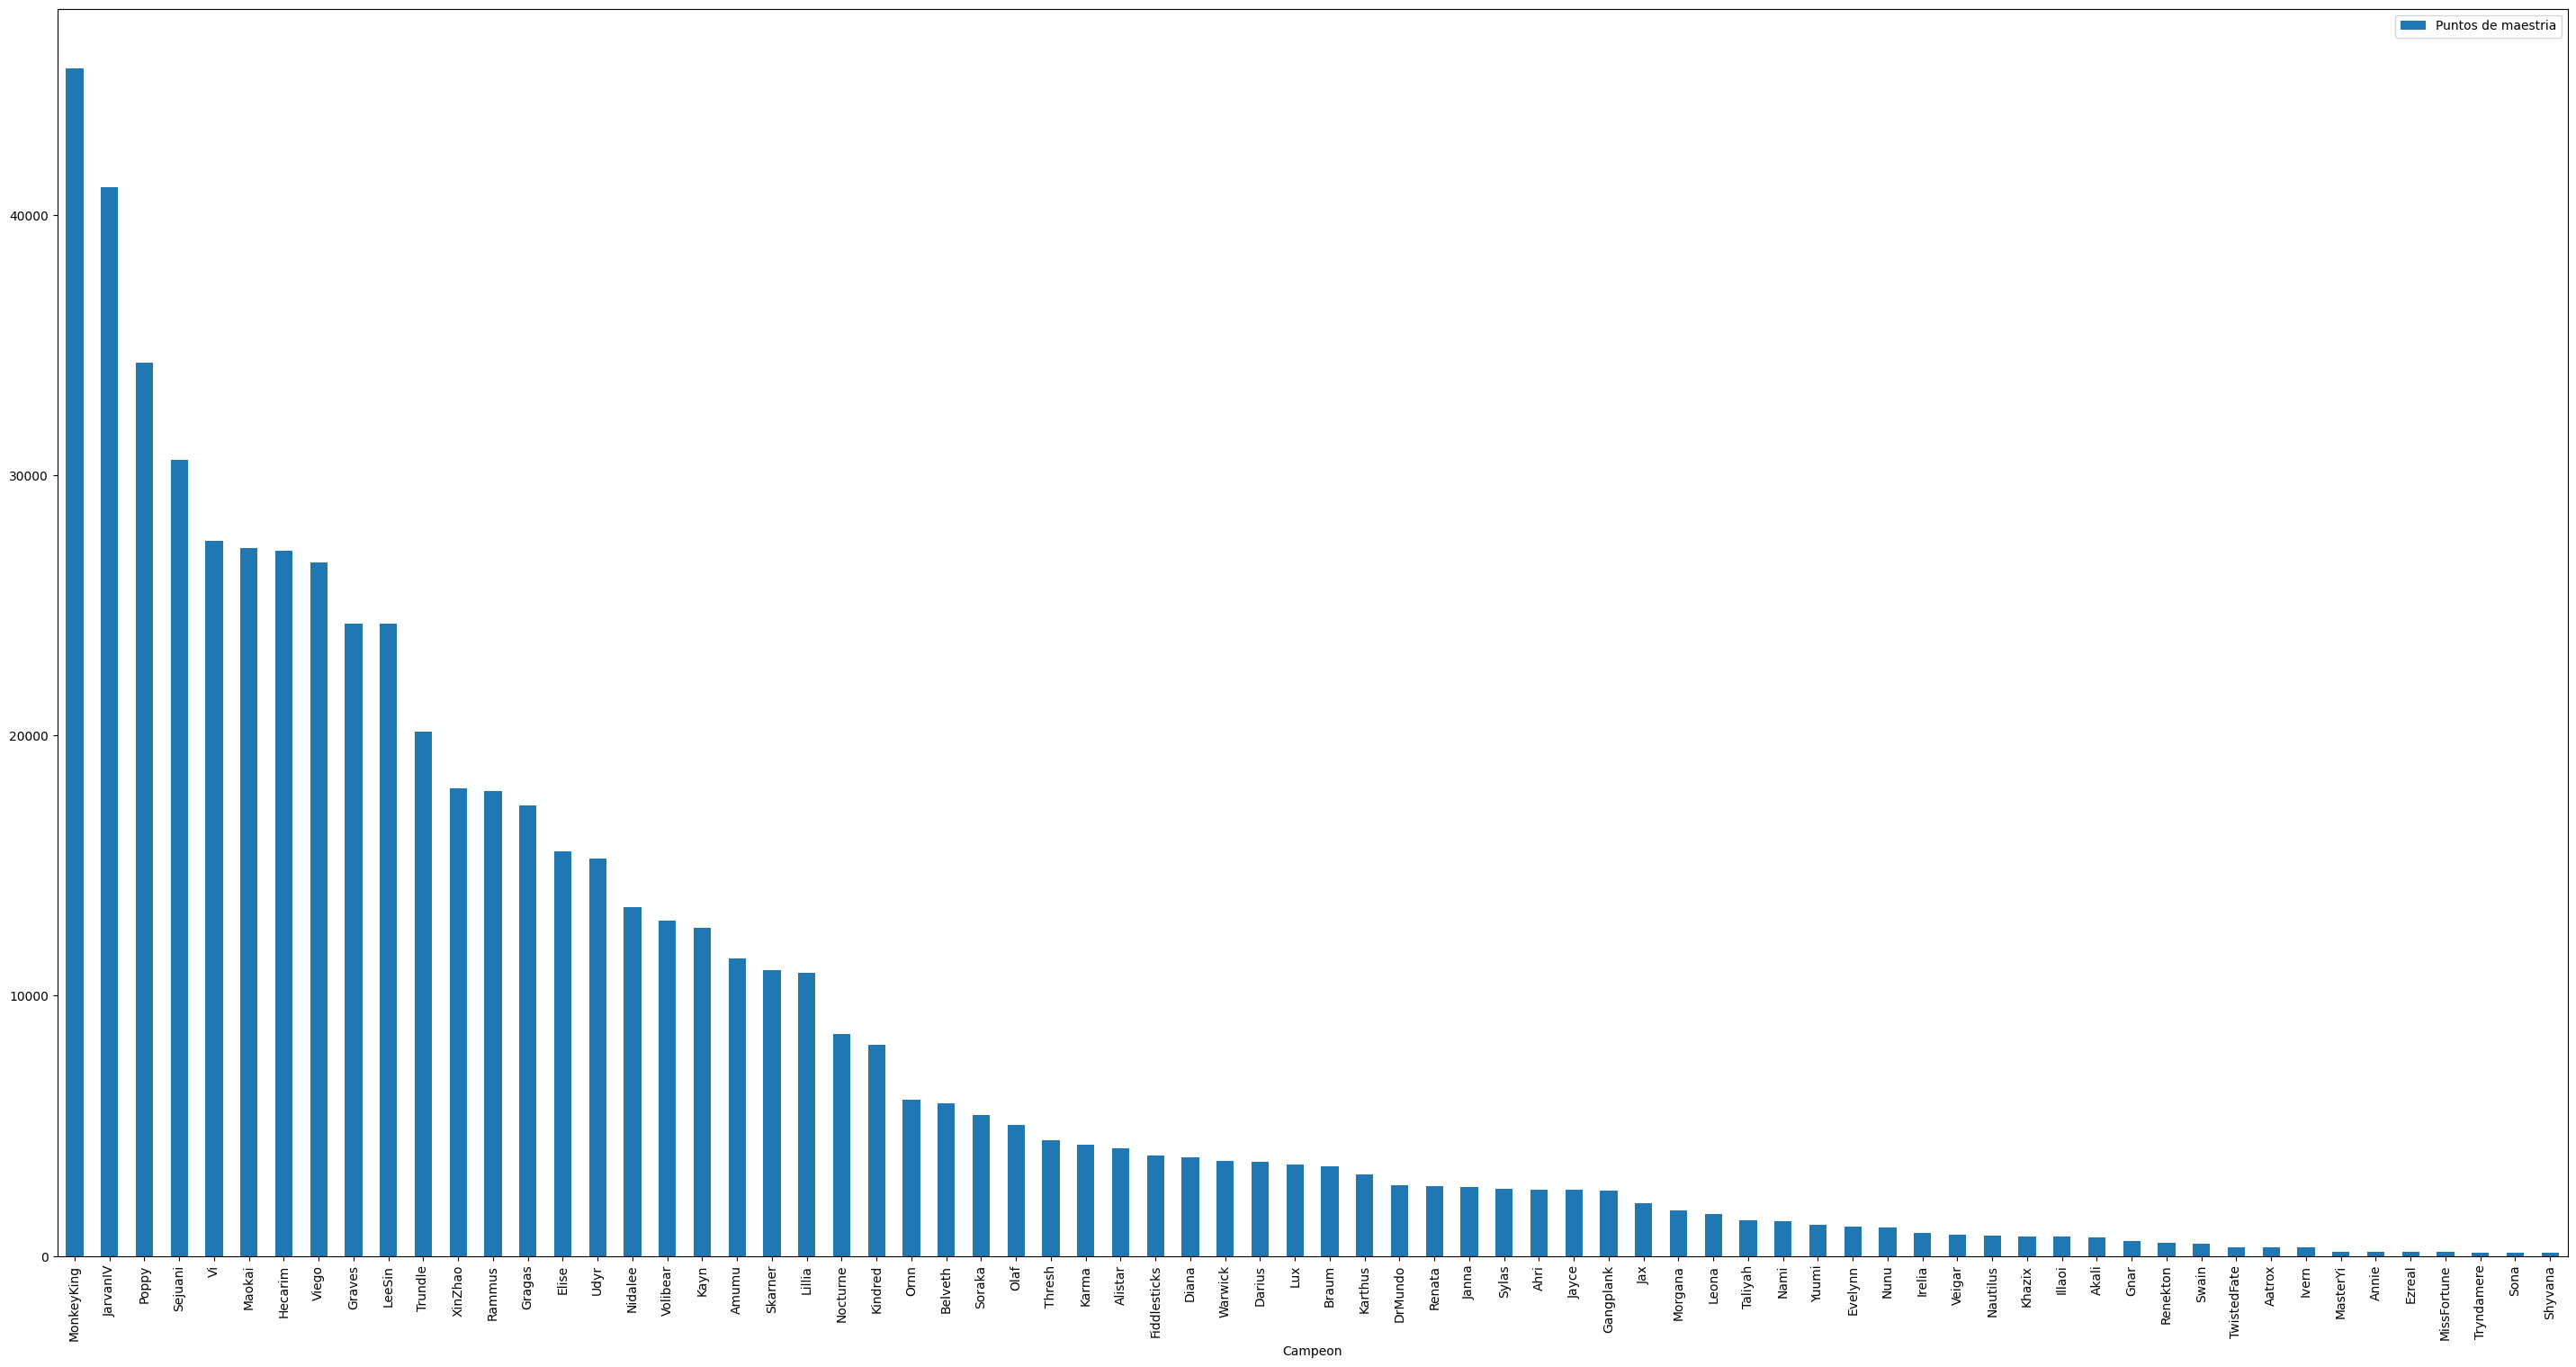

In [18]:
size = len(Maestria)/2
Maestria.plot.bar(x = "Campeon", y = "Puntos de maestria", figsize = (size,size/2))
plt.show()